# MA(1) Signal with Additive White Noise

Here we import nessessary packages 

In [68]:
using Polynomials
using DSP
using Plots
using StatsBase
pyplot()

include("wiener_filter_scalar_fft.jl")

wiener_filter_fft (generic function with 2 methods)

The parameters for this model are defined here.

In [69]:
r = 5
sig_v = 3

3

## A Theoretical Solution

All the details for he formulation of `h_ana` are given in the Wiener Filtering Tutorial.

In [84]:
rho_poly = Poly([1, -(1 + r^2 + sig_v^2)/r, 1])

rhos = roots(rho_poly)

rho = rhos[ abs.(rhos) .< 1][1]

M_h = 50
h_temp = [-sig_v^2/r*rho^(n+1) for n = 1 : M_h - 1]
h_ana = [1-sig_v^2/r*rho; h_temp]

50-element Array{Float64,1}:
  0.7373835392494321
 -0.03831522525397474
 -0.0055901160272553456
 -0.0008155869368126798
 -0.00011899253043341276
 -1.7360776221209494e-5
 -2.5329031150536967e-6
 -3.695455841663834e-7
 -5.391597411098705e-8
 -7.866234610525924e-9
 -1.1476681626944107e-9
 -1.6744252833495167e-10
 -2.442953565025093e-11
  ⋮
 -4.4998768260262596e-33
 -6.565231810358417e-34
 -9.578544122463169e-35
 -1.397490753658017e-35
 -2.038911531429512e-36
 -2.974731834264103e-37
 -4.340075255536019e-38
 -6.332084461111031e-39
 -9.238386724170254e-40
 -1.347862458081458e-40
 -1.966504823999517e-41
 -2.8690918718203966e-42

## Data and Numerical Solution

In [85]:
w = [1, -r];

Here we generate the data

In [86]:
steps = 1*10^6
discard = 10^4
steps_tot = steps + discard

noise_sig = randn(steps_tot)
w = [1, -r];
sig = conv(w,noise_sig)[discard + 1 : steps_tot];

noise_pred = sig_v*randn(steps)
pred = sig .+ noise_pred;

Now we call the program I wrote to Numerically solve the Weiner filter. 

In [87]:
h_num_fft = wiener_filter_fft(pred, sig,par = 30);

Now to verify the preformance.

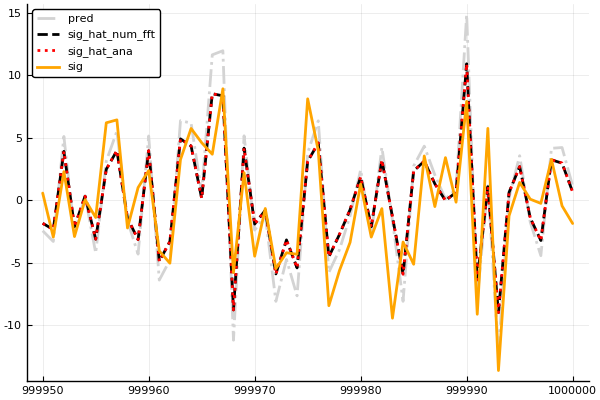

In [88]:
sig_hat_num_fft = conv(real.(h_num_fft),pred)[1:steps]
sig_hat_ana = conv(real.(h_ana),pred)[1:steps]

view = 50
start = 10^6 - 50
tim = start:start + view;
error_num_fft = sum((sig .- sig_hat_num_fft).^2)/steps;
error_ana = sum((sig .- sig_hat_ana).^2)/steps;


plot(tim,[pred[tim] sig_hat_num_fft[tim] sig_hat_ana[tim] sig[tim]],
    color=[:lightgrey :black :red :orange ], 
    line=(2,[:dashdot :dash :dot :solid ]),
    label=[ "pred" "sig_hat_num_fft" "sig_hat_ana" "sig"])

In [89]:
1 - sig_v^2/r*rho - (1+r^2)/r*rho + rho^2
# 1 - (1+r^2 +sig_v^2)/r*rho + rho^2

-7.979727989493313e-17

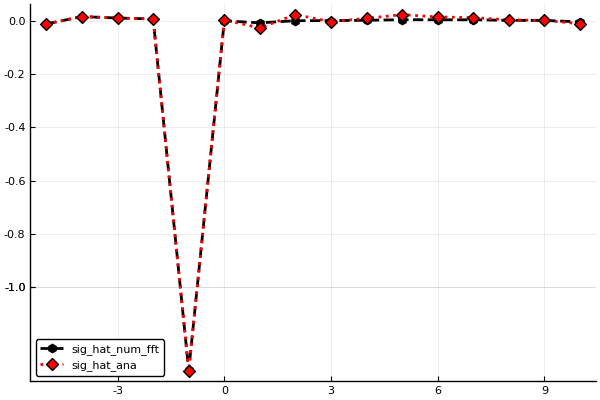

In [90]:
error_num_fft = sig .-sig_hat_num_fft
error_ana = sig .-sig_hat_ana

lags = -5:10

C_ana = my_crosscov(error_ana,pred,lags)
C_num_fft = my_crosscov(error_num_fft,pred,lags)

plot(lags, [C_num_fft C_ana],
    color=[:black :red],
    line=(2,[:dash :dot]),
    label=["sig_hat_num_fft" "sig_hat_ana"],
    marker=([:hex :d],6))

In [76]:
lags = -Nex:0
C_ana = crosscov(error_ana,pred,lags)
C_num = crosscov(error_num,pred,lags)
C_num_fft = crosscov(error_num_fft,pred,lags)

print(mean_and_var(C_num),'\n')
print(mean_and_var(C_num_fft),'\n')
print(mean_and_var(C_ana))

plot(lags, [C_num C_num_fft C_ana],
    color=[:black :grey :red],
    line=(2,[:dash :dashdot :dot]),
    label=["sig_hat_num" "sig_hat_num_fft" "sig_hat_ana"],
    marker=([:hex :hex :d],6))

UndefVarError: UndefVarError: error_num not defined

In [77]:
Nex = 1000;
Theta = 2*pi*(0:Nex - 1)/Nex
Z = exp.(im*Theta);

S_sig_hat_num = z_crossspect(sig_hat_num,sig_hat_num,70; win = "Par")

H(z) = sum([h_ana[i+1]*z^(-i) for i = 0 : M_h-1]);
S_sig_hat_ana(z) = H(z)*(1+r^2 - r*z^(-1) - r*z + sig_v^2)*conj(H(conj(z)^(-1)));

plot(Theta,[real.(S_sig_hat_num.(Z)) real.(S_sig_hat_ana.(Z))],
    color=[:black :red],line=(2,[:dash :dot]),label=["S_sig_hat_num" "S_sig_hat_ana"])

UndefVarError: UndefVarError: z_crossspect not defined